<h1>Monitoring/Learning Curve</h1>

<p>
Analyse de la performance du modèle : Les courbes d'apprentissage sont analysées pour comprendre comment la performance du modèle varie avec la quantité de données d'entraînement. On recherche des signes de surajustement (où la performance sur l'ensemble d'entraînement est bonne mais pauvre sur l'ensemble de validation) ou de sous-ajustement (où la performance est médiocre tant sur l'ensemble d'entraînement que sur l'ensemble de validation).

Choix de la métrique appropriée pour la courbe d'apprentissage qui correspond aux objectifs du modèle. Pour les tâches de régression, des métriques comme le mse(fonction cout) ou RMSE, le R² sont courantes. Pour la classification, des métriques comme le log loss(fonction cout), l'accuracy, la précision, le rappel, ou l'AUC-ROC pourraient être utilisées.


Validation croisée : La validation croisée est utilisée pour obtenir une estimation plus robuste des performances. Chaque point sur la courbe d'apprentissage est la moyenne des scores de plusieurs ensembles de validation croisée, ce qui aide à s'assurer que les résultats ne sont pas dus à une variation aléatoire dans les données.</p>

<img style="width: 40%;" src="https://s3-eu-central-1.amazonaws.com/euc-cdn.freshdesk.com/data/helpdesk/attachments/production/80094719491/original/OtUsUEETkFrWcqAxYQr0i6qd_dRS8xMoRQ.png?1649690810" alt="Description de l'image" />

<div style="background-color: white;"><h1 style="color: #000; font-family: bold; text-align: center">Interprétation des courbes d'apprentissage</h1>


<img style="width: 60%;" src="ressources/learning_curve.png" alt="Description de l'image" />
<p style="color: #000;"><strong>Underfitting</strong><br>
La courbe de cout(erreur) reste élevé même lorsque le nb d'échantillons augmente.<br>
Le modèle s'adapte mal aux données train et généralise mal aux données de validation</p>
<p style="color: green;">Biais élevé<br>
Le modèle est trop simple et n'a pas la capacité de capturer les relations importantes dans les données.</p>
<p style="color: #000;"><strong>Overfitting</strong><br>
Bon sur le train mais l'erreur de validation reste élevé. Généralise mal.<br> Il y a un grand écart(gap) entre le train score et le score de validation.</p>
<p style="color: green;">Variance élevé<br>
Il a appris le bruit spécifique aux données d'entrainement au lieu de la relation sous-jacente,<br>
ce qui entraine une performance médiocre sur les données de validation</p>
<p style="color: #000;"><strong>Good fitting</strong><br>
Erreur de train score et de val score sont faibles et proches l'une de l'autre.<br>
Le modèle s'adapte bien aux données train et généralise bien aux données de validation</p>
<p style="color: green;">Un bon biais et une bonne variance<br>
Erreur de train score et de val score sont faibles et proches l'une de l'autre.<br>
Le modèle s'adapte bien aux données train et généralise bien aux données de validation</p></div>


Décisions sur les données : Si la courbe de validation continue de s'améliorer avec plus de données, cela peut indiquer que le modèle bénéficierait de données supplémentaires. Si la courbe de validation atteint un plateau, cela suggère que des données supplémentaires pourraient ne pas améliorer les performances.

Ajustement de la complexité du modèle : Si la courbe d'apprentissage montre un écart important entre les scores d'entraînement et de validation, cela peut indiquer un surajustement. On peut alors tenter de simplifier le modèle, d'ajouter de la régularisation, ou d'ajouter plus de données. Si les deux courbes sont proches mais que les performances sont faibles, cela peut indiquer un sous-ajustement, et les experts peuvent essayer d'augmenter la complexité du modèle.

<img style="width: 60%;" src="ressources/D8tdw.png" alt="Description de l'image" />
<img style="width: 40%;" src="ressources/bias_variance.png" alt="Description de l'image" />

Premier exercice : A partir du cours précédent, expliquez les courbes ci-dessous. 

<img style="width: 50%;" src="ressources/goodfitting.png" alt="Description de l'image" />
<img style="width: 50%;" src="ressources/overfitting.png" alt="Description de l'image" />
<img style="width: 50%;" src="ressources/underfit.webp" alt="Description de l'image" />


Créer sa propre learning curve:<br>
A partir de vos connaissances, essayez de réaliser une learning curve sur une de vos modèlisations optimisée. 
1. Sur un modele de regression avec comme mesure de performance une fonction cout comme le MSE
1. Si possible, sur un modèle de regression logistique avec comme mesure de performance une fonction cout comme le log loss


Éviter le data leakage : L'ensemble de test doit être complètement isolé du processus d'entraînement et de validation 
pour garantir que l'évaluation des performances du modèle est valide et non biaisée. 
<br><br>
Voir le deuxieme notebook ci-dessous (apres la modélisation) pour un exemple sur 
l'utilisation de learning_curve de sklearn<br><br>

In [15]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from feature_engine.discretisation import ArbitraryDiscretiser
import math
import pandas as pd
import numpy as np


#import du df
df = pd.read_csv('ressources/dataset2.csv')

print(df.head(), df.shape)
# separation des features et de la variable cible
X = df.drop('charges', axis=1)
y = df[['charges']]
print(f'''verif des dimensions X et Y
      X (dataset sans la variable cible): {X.shape}
      Y (la variable cible) : {y.shape}''')


# division du dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
print(f''' verif du split 80 20 
80% du dataset : X train -> {X_train.shape}, Y train -> {y_train.shape}
# 20% du dataset : X test -> {X_test.shape}, Y test -> {y_test.shape}''')

# function custom
def log_transform(x):
    return np.log(x + 1)

def custom_bmi_discretizer(df):
    custom_bins = [0, 30, 100, float('inf')]
    bmi_discretizer = ArbitraryDiscretiser(binning_dict={'bmi': custom_bins}, return_object=True)
    df[['bmi']] = bmi_discretizer.fit_transform(df[['bmi']])
    return df

log_transformer = FunctionTransformer(log_transform)
bmi_discretizer_transformer = FunctionTransformer(custom_bmi_discretizer)

#### ======= preprocessing
#processeur pour split le bmi 
preprocessor_bmi = Pipeline(steps=[
    ('bmi_discretize', bmi_discretizer_transformer)
])

#processeur pour les colonnes numériques 
preprocessor_num = Pipeline(steps=[
    ('log', FunctionTransformer(log_transform)),
])
#processeur pour les colonnes catégorielles 
preprocessor_cat = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('bmi', preprocessor_bmi, ['bmi']),
        ('num', preprocessor_num, ['age', 'bmi', 'children']),
        ('cat', preprocessor_cat, ['region', 'sex', 'smoker'])
    ]
)

#creation pipeline lasso
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regression', Lasso())
])

#test de différents hyperparam d'alpha pour le lasso
param_grid_lasso = {
    'regression__alpha': np.arange(5,10,0.1),
    'regression__precompute': [True],
    'regression__max_iter': [5000],
    
}

### grid search
grid_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5)

# eviter data leakage -> entraîner le pipeline sur les données d'entraînement 
grid_lasso.fit(X_train, y_train)
best_model = grid_lasso.best_estimator_
#puis predire y sur l'ensemble de test avec le meme pipeline
y_pred = best_model.predict(X_test)
# print(y_pred)

#test des les differents metriques sur modele lasso
#comparaison du y prédit avec le y de test
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error du modèle lasso: {mse}')

r2 = r2_score(y_test, y_pred)

print(f'Coefficient de determination R² du modèle lasso: {r2}')

rmse = math.sqrt(mse)
print(f'Root Mean Squared Error (RMSE) du modèle lasso: {rmse} \n rappel moyenne charge : 13279')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 (1337, 7)
verif des dimensions X et Y
      X (dataset sans la variable cible): (1337, 6)
      Y (la variable cible) : (1337, 1)
 verif du split 80 20 
80% du dataset : X train -> (1136, 6), Y train -> (1136, 1)
# 20% du dataset : X test -> (201, 6), Y test -> (201, 1)


/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14418890.434158325, tolerance: 13974848.585028803
  model = cd_fast.enet_coordinate_descent_gram(
/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13374863.975341797, tolerance: 12712696.685221957
  model = cd_fast.enet_coordinate_descent_gram(
/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14410910.182926178, tolerance: 13974848.585028803
  model = cd_fast.enet_coordinate_descen

Mean Squared Error du modèle lasso: 10745231.228891661
Coefficient de determination R² du modèle lasso: 0.9258518942009903
Root Mean Squared Error (RMSE) du modèle lasso: 3277.9919507057457 
 rappel moyenne charge : 13279


Exemple de code pour la creation d'une learning curve sur un modèle de regression.
métrique utilisé ici : rmse

/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2378499.558368683, tolerance: 1290442.0251568267
  model = cd_fast.enet_coordinate_descent_gram(
/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36905188.98135853, tolerance: 2909821.405952846
  model = cd_fast.enet_coordinate_descent_gram(
/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14946717.201217651, tolerance: 4132997.6564295692
  model = cd_fast.enet_coordinate_descent_g

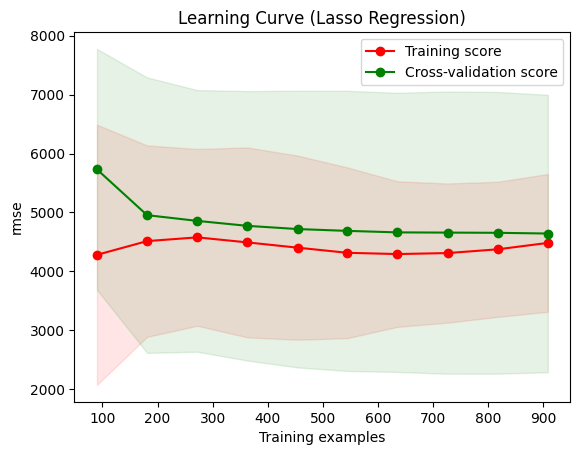

In [16]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = best_model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)

#mettre en racine carré pour exprimer en unités de la variable cible 
train__rmse = np.sqrt(train_scores_mean)
validation_rmse = np.sqrt(validation_scores_mean)
train_scores_std_error = np.sqrt(train_scores_std)
validation_scores_std_error = np.sqrt(validation_scores_std)

plt.figure()
plt.title("Learning Curve (Lasso Regression)")
plt.xlabel("Training examples")
plt.ylabel("rmse")
#plt.gca().invert_yaxis()

# tracage des courbes moyennes
plt.plot(train_sizes, train__rmse, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_rmse, 'o-', color="g", label="Cross-validation score")


plt.fill_between(train_sizes, train__rmse - train_scores_std_error, train__rmse + train_scores_std_error, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_rmse - validation_scores_std_error, validation_rmse + validation_scores_std_error, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2378499.558368683, tolerance: 1290442.0251568267
  model = cd_fast.enet_coordinate_descent_gram(
/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36905188.98135853, tolerance: 2909821.405952846
  model = cd_fast.enet_coordinate_descent_gram(
/home/utilisateur/Bureau/Projets/ML_avance/ml/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14946717.201217651, tolerance: 4132997.6564295692
  model = cd_fast.enet_coordinate_descent_g

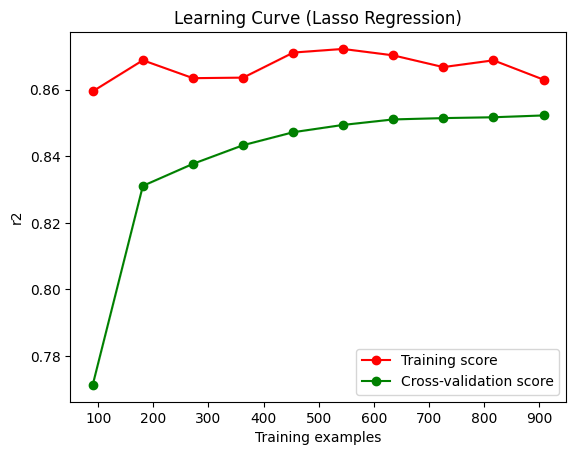

In [17]:
#deuxieme learning curve avec r2


train_sizes, train_scores, validation_scores = learning_curve(
    estimator = best_model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'r2'
)

train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (Lasso Regression)")
plt.xlabel("Training examples")
plt.ylabel("r2")
#plt.gca().invert_yaxis()

# tracage
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean, train_scores_mean, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean, validation_scores_mean, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()